# Objectif

L’objectif de ce TP est d’analyser un corpus de tweets en fonction des opinions exprimées (positif/-
négatif).

# Import and load data

In [1]:
import pandas as pd
import os
import nltk as nltk
import re
from nltk.corpus import wordnet as wn

In [2]:
df = pd.read_csv('https://clavel.wp.imt.fr/files/2018/05/testdata.manual.2009.06.14.csv_.zip', compression='zip', header=None)

In [3]:
df.columns = ['polarite','id','date','requete','utilisateur','text']

In [4]:
df.head(10)

,polarite,id,date,requete,utilisateur,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...
5,4,8,Mon May 11 03:22:00 UTC 2009,kindle2,GeorgeVHulme,@richardebaker no. it is too big. I'm quite ha...
6,0,9,Mon May 11 03:22:30 UTC 2009,aig,Seth937,Fuck this economy. I hate aig and their non lo...
7,4,10,Mon May 11 03:26:10 UTC 2009,jquery,dcostalis,Jquery is my new best friend.
8,4,11,Mon May 11 03:27:15 UTC 2009,twitter,PJ_King,Loves twitter
9,4,12,Mon May 11 03:29:20 UTC 2009,obama,mandanicole,how can you not love Obama? he makes jokes abo...


In [6]:
d = pd.read_csv('/home/b/gitMSBGD/web_data/Lexiques/SlangLookupTable.txt', sep='\t', encoding='latin1', header=None, index_col=0).to_dict()[1]

# .2 Prétraitements

In [7]:
def algo1(tweet):
    text = df[df.id==tweet].text.values[0]
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    counts = text.count('@'),text.count('#')
    text = text.replace('@','').replace('#','')
    words = nltk.word_tokenize(text)
    return [word if word not in d.keys() else d[word] for word in words], counts

In [8]:
df['nb_@'] = df.id.apply(lambda x: algo1(x)[1][0])
df['nb_#'] = df.id.apply(lambda x: algo1(x)[1][1])

In [13]:
print("Il y a {} @ et {} # dans l'ensemble du corpus".format(df['nb_@'].sum(), df['nb_#'].sum()))

Il y a 126 @ et 52 # dans l'ensemble du corpus


# 3.3 Etiquetage grammatical

In [19]:
def algo2(tokens):
    taggedData = nltk.pos_tag(tokens)
    nb_vb = sum([x[1][:2]=='VB' for x in taggedData])
    return taggedData, nb_vb

In [20]:
df['nb_vb'] = df.id.apply(lambda x : algo2(algo1(x)[0])[1])

In [21]:
df['tagg'] = df.id.apply(lambda x : algo2(algo1(x)[0])[0])

In [22]:
df.head()

,polarite,id,date,requete,utilisateur,text,nb_@,nb_#,nb_vb,tagg
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,1,0,3,"[(stellargirl, NN), (I, PRP), (loooooooovvvvvv..."
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,0,0,3,"[(Reading, VBG), (my, PRP$), (kindle2, NN), (...."
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",0,1,1,"[(Ok, NNP), (,, ,), (first, JJ), (assesment, N..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,1,0,5,"[(kenburbary, NN), (You, PRP), ('ll, MD), (lov..."
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,1,0,3,"[(mikefish, JJ), (Fair, NNP), (enough, RB), (...."


# 3.4 v1 

In [27]:
from nltk.corpus import sentiwordnet as swn

In [117]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /home/b/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [24]:
def f(taggedData):
    return [x for x in taggedData if x[1][:2] in ['NN','JJ', 'RB','VB']]

In [25]:
df['filter_tagg'] = df.tagg.apply(f)

In [17]:
df.head()

,polarite,id,date,requete,utilisateur,text,nb_@,nb_#
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,1,0
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,0,0
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",0,1
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,1,0
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,1,0


In [14]:
def compute_sentiment(pos, neg):
    if pos == neg:
        return 2
    elif pos>neg:
        return 4
    else:
        return 0

In [247]:
def score(taggedData):
    synsets = [wn.synsets(tag[0]) for tag in taggedData]
    neg = [swn.senti_synset(synset[0].name()).neg_score() if synset!=[] else 0 for synset in synsets]
    pos = [swn.senti_synset(synset[0].name()).pos_score() if synset!=[] else 0 for synset in synsets]
    print(pos)
    return sum(pos), sum(neg), compute_sentiment(sum(pos), sum(neg))

In [30]:
df['score'] = df.filter_tagg.apply(score)

In [31]:
df.head()

,polarite,id,date,requete,utilisateur,text,nb_@,nb_#,nb_vb,tagg,filter_tagg,score
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,1,0,3,"[(stellargirl, NN), (I, PRP), (loooooooovvvvvv...","[(stellargirl, NN), (loooooooovvvvvveee, VBP),...","(1.125, 1.25, 0)"
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...,0,0,3,"[(Reading, VBG), (my, PRP$), (kindle2, NN), (....","[(Reading, VBG), (kindle2, NN), (Love, VB), (L...","(1.625, 0.125, 4)"
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",0,1,1,"[(Ok, NNP), (,, ,), (first, JJ), (assesment, N...","[(Ok, NNP), (first, JJ), (assesment, NN), (kin...","(0.0, 0.0, 2)"
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...,1,0,5,"[(kenburbary, NN), (You, PRP), ('ll, MD), (lov...","[(kenburbary, NN), (love, VB), (Kindle2, NNP),...","(2.0, 1.75, 4)"
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...,1,0,3,"[(mikefish, JJ), (Fair, NNP), (enough, RB), (....","[(mikefish, JJ), (Fair, NNP), (enough, RB), (i...","(0.0, 0.0, 2)"


In [33]:
np.sum(df.score.apply(lambda x:x[2]) == df.polarite)

263

In [263]:
np.mean(df.pred == df.polarite)

0.5281124497991968

# 3.5 v2 negation et modifieurs

In [90]:
neg_word_list = pd.read_csv('/home/b/gitMSBGD/web_data/Lexiques/NegatingWordList.txt', header=None)[0].values
booster_word_list = pd.read_csv('/home/b/gitMSBGD/web_data/Lexiques/BoosterWordList.txt', header=None)

In [37]:
booster_dict = {x.split('\t')[0]:x.split('\t')[1] for x in booster_word_list[0].values}

In [97]:
neg_in_pos_tweet = 0
def score2(taggedData):
    global neg_in_pos_tweet
    boost_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in booster_dict.keys()]
    neg_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in neg_word_list]
    synsets = [wn.synsets(tag[0]) for tag in taggedData]
    neg = [swn.senti_synset(synset[0].name()).neg_score() if synset!=[] else 0 for synset in synsets]
    pos = [swn.senti_synset(synset[0].name()).pos_score() if synset!=[] else 0 for synset in synsets]
    neg = [neg[i]*2 if i in boost_idx else neg[i] for i in range(len(neg))]
    pos = [pos[i]*2 if i in boost_idx else pos[i] for i in range(len(pos))]
    neg = [pos[i] if i in neg_idx else neg[i] for i in range(len(neg))]
    pos = [neg[i] if i in neg_idx else pos[i] for i in range(len(pos))]
    sentiment = compute_sentiment(sum(pos), sum(neg))
    if sentiment < 4:
        neg_in_pos_tweet += len(neg_idx)
    return sum(pos), sum(neg), sentiment

In [99]:
df['score2'] = df.filter_tagg.apply(score2)

In [101]:
neg_in_pos_tweet

30

In [160]:
np.sum(df.score2.apply(lambda x: x[2]) == df.polarite)

264

In [251]:
np.mean(df.score2.apply(lambda x: x[2]) == df.polarite)

0.5301204819277109

# 3.6 emoticons

In [127]:
emoticons = pd.read_csv('/home/b/gitMSBGD/web_data/Lexiques/EmoticonLookupTable.txt', sep='\t', header=None, index_col=0).to_dict()[1]


In [123]:
from nltk.tokenize import TweetTokenizer
tokenizer= TweetTokenizer()
def algo1bis(tweet):
    text = df[df.id==tweet].text.values[0]
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    counts = text.count('@'),text.count('#')
    text = text.replace('@','').replace('#','')
    words = tokenizer.tokenize(text)
    return [word if word not in d.keys() else d[word] for word in words], counts

In [350]:
emo_count = 0
def score3(taggedData):
    global emo_count
    emo = [emoticons[tag[0]] for idx, tag in enumerate(taggedData) if tag[0] in emoticons.keys()]
#     print(emo)
    emo_count += len(emo)
    boost_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in booster_dict.keys()]
    neg_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in neg_word_list]
    synsets = [wn.synsets(tag[0]) for tag in taggedData]
    neg = [swn.senti_synset(synset[0].name()).neg_score() if synset!=[] else 0 for synset in synsets]
    pos = [swn.senti_synset(synset[0].name()).pos_score() if synset!=[] else 0 for synset in synsets]
    print(pos)
    neg = [neg[i]*2 if i in boost_idx else neg[i] for i in range(len(neg))]
    pos = [pos[i]*2 if i in boost_idx else pos[i] for i in range(len(pos))]
    print(pos)
    neg = [pos[i] if i in neg_idx else neg[i] for i in range(len(neg))]
    pos = [neg[i] if i in neg_idx else pos[i] for i in range(len(pos))]
    pos, neg = sum(pos)+sum([x>0 for x in emo]), sum(neg)+sum([x<0 for x in emo])
    return pos, neg, compute_sentiment(pos, neg)

In [384]:
swn.senti_synset(wn.synsets('cool')[0].name()).neg_score()

0.375

In [382]:
taggedData = f(algo2(algo1ter(46)[0])[0])
synsets = [wn.synsets(tag[0]) for tag in taggedData]
list(zip([swn.senti_synset(synset[0].name()).pos_score() if synset!=[] else 0 for synset in synsets], [swn.senti_synset(synset[0].name()).neg_score() if synset!=[] else 0 for synset in synsets], taggedData))

[(0, 0, ('Booz', 'NNP')),
 (0.0, 0.0, ('Allen', 'NNP')),
 (0.0, 0.0, ('Hamilton', 'NNP')),
 (0.0, 0.0, ('has', 'VBZ')),
 (0.0, 0.875, ('bad', 'JJ')),
 (0.0, 0.0, ('ass', 'NN')),
 (0.0, 0.0, ('homegrown', 'VBN')),
 (0.0, 0.0, ('social', 'JJ')),
 (0.0, 0.0, ('collaboration', 'NN')),
 (0.0, 0.0, ('platform', 'NN')),
 (0.0, 0.0, ('Way', 'JJ')),
 (0.25, 0.375, ('cool', 'JJ')),
 (0, 0, ('ttiv', 'NN'))]

In [346]:
score(f(algo2(algo1bis(14)[0])[0]))

[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.0]


(1.0, 0.625, 4)

In [351]:
score3(f(algo2(algo1bis(14)[0])[0]))

[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.0]


(1.0, 0.625, 4)

In [236]:
df.text[0]

'@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'

In [225]:
df['score3'] = df.id.apply(lambda x: score3(f(algo2(algo1bis(x)[0])[0])))

[0, 0, 0.0, 0.625, 0, 0.125, 0.375, 0.125, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.375, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
[0.0, 0.0, 0.625, 0.0, 0.0, 0.25, 0.5, 0.25]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.125, 0.125, 0.625, 0]
[0, 0, 0.625, 0.0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.125, 0.25, 0.125, 0, 0.625, 0.0, 0.0]
[0, 0.25, 0.125, 0.25, 0, 0.0, 0.875, 0.0]
[0.0, 0.0, 0.375, 0, 0.625, 0.0, 0.125, 0.0]
[0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0]
[0, 0.125, 0.0, 0.0, 0.0]
[0, 0.25, 0.375, 0.25, 0.125]
[0.0, 0.0]
[0.625, 0.0]
[0.625, 0.0, 0, 0.0, 0.0]
[0.0, 0.625, 0, 0.5, 0.375]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0, 0.0, 0.0, 0, 0, 0, 0.0, 0.25, 0.125, 0.0, 0.0, 

[0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0]
[0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0, 0]
[0.0, 0.0, 0.125, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.125, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.5, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.625, 0.125, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0]
[0.625, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.125, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.25]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0, 0.0]
[0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.625, 0.5]
[0.0, 0.0, 0.0, 0.375, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0,

[0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
[0, 0.0, 0.125, 0.0, 0.0, 0.125, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.125, 0.125, 0.25, 0, 0.0, 0.0, 0]
[0.0, 0.25, 0.0, 0, 0.0, 0.0, 0]
[0, 0, 0.125, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0]
[0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.625, 0.0, 0.125, 0.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.25, 0, 0.0, 0.0, 0.0]
[0, 0.625, 0.0, 0.0, 0.125, 0, 0.5, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.375, 0.0]
[0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.625, 0]
[0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.125, 0.0, 0, 0.0, 0, 0.125, 0.0, 0, 0.0, 0.125, 0.0, 0.0, 0]
[0.5, 0.375, 0.0, 0.25, 0, 0.0, 0.25, 0.375, 0, 0.0, 0, 0.25, 0.0, 0, 0.0, 0.0, 0.25, 0.25, 0]
[0.0, 0, 0.125, 0, 0]
[0.0, 0, 0.0, 0, 0]
[0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0, 0.25]
[0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0]
[0, 0.125, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.125, 0.0, 0.0, 0, 0.0, 0.0, 0, 0]
[0.875, 0.0, 0.0, 0, 0.0, 0.0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.25, 0.125, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0]
[0.0, 0.0, 0.125, 0, 0.0]
[0.0, 0.0, 0.875, 0, 0.5]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0]
[0.0, 0.0, 0.0, 0, 0]
[0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[0.625, 0.125, 0.0, 0.0, 0.0, 0, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.875, 0.125, 0.5, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0.25, 0.0, 0.0, 0.625]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.375, 0.5, 0.0, 0.0, 0.125]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0, 0.0, 0.25, 0, 0.25, 0.0, 0.0, 0, 0.375]
[0, 0.625, 0.125, 0, 0.0, 0.0, 0.0, 0, 0.125]
[0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.75, 0.375, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.25, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.375, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.125, 0.0, 0.25]
[0.0, 0.125, 0.0, 0.0, 0.0, 0.25, 0.0, 0, 0.0, 0.875, 0, 0.25, 0.0, 0.0, 0, 0.25, 0.0, 0.25]
[0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0.0, 0.0, 0.0]


In [250]:
np.sum(df.score3.apply(lambda x: x[2]) == df.polarite)

282

In [162]:
from sklearn.metrics import confusion_matrix

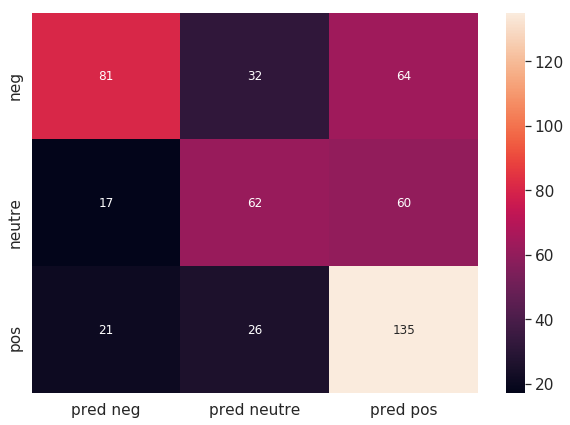

In [197]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
labels=['neg','neutre','pos']
cm = confusion_matrix(df.polarite, df.score3.apply(lambda x: x[2]))
df_cm = pd.DataFrame(cm, labels,
                  ['pred '+x for x in labels])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12}, fmt='.0f')# font size

# V4

In [381]:
df.text.iloc[27]

'Booz Allen Hamilton has a bad ass homegrown social collaboration platform. Way cool!  #ttiv'

In [210]:
df[df.score3.apply(lambda x: x[2])!=df.polarite]

,polarite,id,date,requete,utilisateur,text,nb_@,nb_#,nb_vb,tagg,filter_tagg,score,score2,score3
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...,1,0,3,"[(stellargirl, NN), (I, PRP), (loooooooovvvvvv...","[(stellargirl, NN), (loooooooovvvvvveee, VBP),...","(1.125, 1.25, 0)","(1.125, 1.25, 0)","(1.125, 1.25, 0)"
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck...",0,1,1,"[(Ok, NNP), (,, ,), (first, JJ), (assesment, N...","[(Ok, NNP), (first, JJ), (assesment, NN), (kin...","(0.0, 0.0, 2)","(0.0, 0.0, 2)","(0.0, 0.0, 2)"
11,0,14,Mon May 11 03:32:48 UTC 2009,obama,kylesellers,@Karoli I firmly believe that Obama/Pelosi hav...,1,0,6,"[(Karoli, NNP), (I, PRP), (firmly, RB), (belie...","[(Karoli, NNP), (firmly, RB), (believe, VBP), ...","(1.0, 0.625, 4)","(1.0, 0.625, 4)","(1.0, 0.625, 4)"
14,0,17,Mon May 11 05:06:22 UTC 2009,nike,vincentx24x,"dear nike, stop with the flywire. that shit is...",1,0,3,"[(dear, NN), (nike, NN), (,, ,), (stop, VB), (...","[(dear, NN), (nike, NN), (stop, VB), (flywire,...","(1.125, 0.75, 4)","(1.125, 0.75, 4)","(1.125, 0.75, 4)"
15,4,18,Mon May 11 05:20:15 UTC 2009,lebron,cameronwylie,"#lebron best athlete of our generation, if not...",0,1,4,"[(lebron, NN), (best, JJS), (athlete, NN), (of...","[(lebron, NN), (best, JJS), (athlete, NN), (ge...","(0.25, 0.875, 0)","(0.25, 0.875, 0)","(0.25, 0.875, 0)"
22,4,25,Mon May 11 05:22:37 UTC 2009,lebron,emceet,@wordwhizkid Lebron is a beast... nobody in th...,1,0,2,"[(wordwhizkid, NN), (Lebron, NNP), (is, VBZ), ...","[(wordwhizkid, NN), (Lebron, NNP), (is, VBZ), ...","(0.25, 0.5, 0)","(0.25, 0.5, 0)","(0.25, 0.5, 0)"
25,4,34,Mon May 11 19:49:21 UTC 2009,fredwilson,andrewwatson,http://twurl.nl/epkr4b - awesome come back fro...,0,0,0,[],[],"(0, 0, 2)","(0, 0, 2)","(0, 0, 2)"
26,4,35,Mon May 11 19:50:07 UTC 2009,fredwilson,fredwilson,In montreal for a long weekend of R&amp;R. Muc...,0,0,1,"[(In, IN), (montreal, NN), (for, IN), (a, DT),...","[(montreal, NN), (long, JJ), (weekend, NN), (R...","(0.75, 0.75, 2)","(0.75, 0.75, 2)","(0.75, 0.75, 2)"
27,4,46,Thu May 14 02:58:07 UTC 2009,"""booz allen""",JoeSchueller,Booz Allen Hamilton has a bad ass homegrown so...,0,1,2,"[(Booz, NNP), (Allen, NNP), (Hamilton, NNP), (...","[(Booz, NNP), (Allen, NNP), (Hamilton, NNP), (...","(0.25, 1.25, 0)","(0.25, 1.25, 0)","(0.25, 1.25, 0)"
28,4,47,Thu May 14 02:58:23 UTC 2009,"""booz allen""",scottabel,[#MLUC09] Customer Innovation Award Winner: Bo...,0,1,0,"[([, JJ), (MLUC09, NNP), (], NNP), (Customer, ...","[([, JJ), (MLUC09, NNP), (], NNP), (Customer, ...","(0.0, 0.0, 2)","(0.0, 0.0, 2)","(0.0, 0.0, 2)"


In [336]:
score3(f(algo2(algo1ter(14)[0])[0]))

[0, 0.0, 0.0, 0, 0, 0, 0.0, 0.25, 0.125, 0.0, 0.0, 0, 0.0, 0.0, 0.25, 0.0, 0.0]
[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.0]


(1.0, 0.625, 4)

In [389]:
swn.senti_synset(wn.synsets('desire')[0].name()).neg_score()

0.125

In [256]:
df[df.score3.apply(lambda x: x[2])!=df.polarite].iloc[2].text

"@Karoli I firmly believe that Obama/Pelosi have ZERO desire to be civil.  It's a charade and a slogan, but they want to destroy conservatism"

In [332]:
score3(f(algo2(algo1ter(14)[0])[0]))

[0, 0.0, 0.0, 0, 0, 0, 0.0, 0.25, 0.125, 0.0, 0.0, 0, 0.0, 0.0, 0.25, 0.0, 0.0]
[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.0]


(1.0, 0.625, 4)

In [215]:
df.text[0]

'@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.'

In [220]:
score3(algo2(algo1bis(3)[0])[0])[0]

[0.0, 0.0, 0.0, 0.625, 0.125, 0.375, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.375, 0.0, 0.0, 0.0, 0.0]


1.125

In [314]:
def delete_cons_car(text):
    found = re.findall(r'((\w)\2{2,})', text)
#     print(found)
    for x in found:
        text = text.replace(x[0],x[1])
    return text

In [312]:
def algo1ter(tweet):
    text = df[df.id==tweet].text.values[0]
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    counts = text.count('@'),text.count('#')
    text = text.replace('@','').replace('#','')
    text = delete_cons_car(text)
    words = tokenizer.tokenize(text)
    return [word if word not in d.keys() else d[word] for word in words], counts

In [373]:
def algo1ter(tweet):
    text = df[df.id==tweet].text.values[0]
    text = re.sub(r"http\S+", '', text, flags=re.MULTILINE)
    counts = text.count('@'),text.count('#')
    text = text.replace('@','').replace('#','')
    text = delete_cons_car(text)
    words = tokenizer.tokenize(text)
    return [word if word not in d.keys() else d[word] for word in words], counts

In [313]:
score(f(algo2(algo1ter(3)[0])[0]))

[('oooooooo', 'o'), ('vvvvvv', 'v'), ('eee', 'e')]
[0, 0.625, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.375, 0.0, 0.0]


(1.75, 1.25, 4)

In [318]:
df['score4'] = df.id.apply(lambda x: score3(f(algo2(algo1ter(x)[0])[0])))

[0, 0, 0.0, 0.625, 0, 0.125, 0.375, 0.125, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.375, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0]
[0.0, 0.0, 0.625, 0.0, 0.0, 0.25, 0.5, 0.25]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0, 0.0, 0.125, 0.0, 0.125, 0.125, 0.125, 0.625, 0]
[0, 0, 0.625, 0.0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.125, 0.25, 0.125, 0, 0.625, 0.0, 0.0]
[0, 0.25, 0.125, 0.25, 0, 0.0, 0.875, 0.0]
[0.0, 0.0, 0.375, 0, 0.625, 0.0, 0.125, 0.0]
[0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0]
[0, 0.125, 0.0, 0.0, 0.0]
[0, 0.25, 0.375, 0.25, 0.125]
[0.0, 0.0]
[0.625, 0.0]
[0.625, 0.0, 0, 0.0, 0.0]
[0.0, 0.625, 0, 0.5, 0.375]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0, 0.0, 0.0, 0, 0, 0, 0.0, 0.25, 0.125, 0.0, 0.0, 

[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0.375, 0.0, 0, 0.0]
[0, 0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0.0, 0]
[0, 0, 0.0, 0, 0.375, 0.0, 0, 0.375, 0, 0.0, 0.625, 0]
[0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.125, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0]
[0.0, 0.0, 0.0, 0.125, 0, 0.0, 0.625, 0.0, 0, 0.0, 0, 0.0, 0]
[0, 0.0, 0]
[0, 0.0, 0]
[0.0, 0.0, 0.25, 0.0, 0, 0.0, 0.0, 0.0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0, 0.75, 0.0, 0.0, 0, 0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.625, 0.125, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.25, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0]
[0.125, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0]
[0, 0.0, 0]
[0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.875, 0.0, 0.0, 0, 0.125]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0, 0,

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0, 0, 0.0, 0]
[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.375, 0, 0, 0, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.375, 0, 0.5, 0.0, 0.375, 0]
[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0]
[0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.125, 0.0, 0.125]
[0.25, 0.0, 0.0]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.0, 0.0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.625, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.625, 0.0, 0]
[0.125, 0.625, 0.0

[0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.5, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.875, 0]
[0.0, 0.0, 0, 0.0, 0.125, 0.0]
[0.0, 0.125, 0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0, 0, 0.125, 0.0, 0.375, 0.0, 0.0, 0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0.0, 0.0, 0.0, 0, 0, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0.25, 0.0, 0.5, 0.0, 0.0, 0.125]
[0.0, 0.625, 0.0, 0, 0.0, 0]
[0.5, 0.0, 0.0, 0, 0.0, 0]
[0.0, 0.5, 0, 0]
[0.5, 0.375, 0, 0]
[0, 0.625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0, 0]
[0.0, 0, 0.0, 0.0, 0]
[0.0, 0, 0.0, 0.125, 0]
[0, 0, 0.125, 0, 0.0, 0.0, 0.0, 0, 0]
[0, 0, 0.875, 0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.125, 0.125, 0.0, 0.375, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0.25, 0.0, 0.0, 0.0, 0.125, 0.375, 0.0, 0, 0.0, 0.375, 0.0, 0.0, 0, 0.625, 0.0]
[0.0, 0, 0.0, 0.0, 0.0, 0]
[0.125, 0, 0.0, 0.0, 0.0, 0]
[0.0, 0, 0.0, 0.0, 0, 0.0]
[0.0, 0, 0.375, 0.0, 0, 0.375]
[0.375

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0]
[0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.25, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0.0, 0.25, 0.0, 0.0, 0, 0.625, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.25, 0.0, 0.375, 0.0, 0.0, 0, 0]
[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]
[0.125, 0.25, 0.5, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0]
[0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.25, 0.875, 0.0, 0.0, 0.0, 0, 0.0, 0.125, 0.0, 0, 0.0]
[0.125, 0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0, 0.0]
[0.0, 0, 0.0, 0.0, 0.125, 0.125, 0.0, 0.0, 0, 0.0]
[0.125, 0.0, 0.0, 0.0, 0.0]
[0.25, 0.0, 0.0, 0.5, 0.0]
[0.25, 0, 0.0, 0.0, 0.625, 0.0, 0.0, 0.0, 0, 0.125, 0.0, 0, 0]
[0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0, 0.125, 0.0, 0, 0]
[0, 0.0, 0.0, 0.125, 0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0]
[0, 0.125, 0.0, 0.125, 0, 0.5, 0, 0.875, 0.0, 0.0, 0.0, 0.0, 0.125, 0.875, 

In [375]:
df['score5'] = df.id.apply(lambda x: score3(f(algo2(algo1ter(x)[0])[0])))

[0, 0.625, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.375, 0.0, 0.0]
[0, 0.625, 0.0, 0.0, 0, 0.25, 0.25, 0.25, 0.375, 0.0, 0.0]
[0.0, 0.0, 0.625, 0.0, 0.0, 0.25, 0.5, 0.25]
[0.0, 0.0, 0.625, 0.0, 0.0, 0.25, 0.5, 0.25]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0, 0.0]
[0, 0, 0.625, 0.0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0]
[0, 0, 0.625, 0.0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.25, 0.0, 0.25, 0.0, 0.125, 0.125, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0]
[0, 0.25, 0.125, 0.25, 0, 0.0, 0.875, 0.0]
[0, 0.25, 0.125, 0.25, 0, 0.0, 0.875, 0.0]
[0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.125, 0, 0.0, 0.0, 0.0, 0.0]
[0, 0.25, 0.375, 0.25, 0.125]
[0, 0.25, 0.375, 0.25, 0.125]
[0.625, 0.0]
[0.625, 0.0]
[0.0, 0.625, 0, 0.5, 0.375]
[0.0, 0.625, 0, 0.5, 0.375]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0]
[0, 0.5, 0.125, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0.

[0.0, 0.0, 0.0, 0.125, 0, 0.0, 0.625, 0.0, 0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0.125, 0, 0.0, 0.625, 0.0, 0, 0.0, 0, 0.0]
[0, 0.0, 0]
[0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0, 0.75, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0, 0.75, 0.0, 0.0, 0]
[0.625, 0.125, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.625, 0.25, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.125, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0]
[0.125, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0]
[0, 0.0, 0]
[0, 0.0, 0]
[0.0, 0.875, 0.0, 0.0, 0, 0.125]
[0.0, 0.875, 0.0, 0.0, 0, 0.125]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0, 0, 0.0, 0.125, 0.0, 0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.25]
[0, 0, 0.0, 0.125, 0.0, 0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.25]
[0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0]
[0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.625, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.125, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.

[0, 0.25, 0.25]
[0, 0.25, 0.25]
[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0.0, 0.5, 0]
[0.0, 0, 0, 0.0, 0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0.0, 0.5, 0]
[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0, 0, 0.5]
[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0, 0, 0.5]
[0, 0.625, 0, 0, 0]
[0, 0.625, 0, 0, 0]
[0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0]
[0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0]
[0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0]
[0.0, 0, 0, 0.0]
[0.0, 0, 0, 0.0]
[0.0, 0, 0]
[0.0, 0, 0]
[0.25, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.25, 0.75]
[0.25, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.25, 0.75]
[0.0, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0]
[0.0, 0, 0, 0, 0.0, 0.25, 0.0, 0.0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
[0, 0.0, 0.0, 0.0, 0.0, 0.

[0, 0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0, 0.375, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.5, 0.375, 0.0, 0.0, 0]
[0, 0, 0.375, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.5, 0.375, 0.0, 0.0, 0]
[0.0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0.0, 0, 0.0, 0, 0.0, 0.0, 0, 0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
[0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0.0, 0.0, 0, 0.0, 0.0]
[0, 0.0, 0, 0, 0, 0.0, 0.0]
[0, 0.0, 0, 0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0, 0.0, 0.0]
[0.625, 0, 0.125, 0.25, 0, 0, 0.0, 0.0, 0.0, 0, 0.125, 0.0, 0, 0.0, 0.0]
[0.625, 0, 0.125, 0.25, 0, 0, 0.0, 0.0, 0.0, 0, 0.125, 0.0, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.5, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.5, 0.0]
[0.0, 0.0, 0, 0.0, 0.5, 0.0]
[0.0, 0.0, 0, 0.0, 0.5, 0.0]
[0.0, 0, 0.125, 0.0, 0.375, 0.0, 0.5]
[0.0, 0, 0.125, 0.0, 0.375, 0.0, 0.5]
[0.125, 0.375, 0.0]
[0.1

In [378]:
np.sum(df.score4.apply(lambda x: x[2]) == df.polarite)

284

In [377]:
np.sum(df.score5.apply(lambda x: x[2]) == df.polarite)

286

In [406]:
emo_count = 0
def score6(taggedData):
    global emo_count
    emo = [emoticons[tag[0]] for idx, tag in enumerate(taggedData) if tag[0] in emoticons.keys()]
#     print(emo)
    emo_count += len(emo)
    boost_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in booster_dict.keys()]
    neg_idx = [idx+1 for idx, tag in enumerate(taggedData) if tag[0] in neg_word_list]
    synsets = [wn.synsets(tag[0]) for tag in taggedData]
    neg = [swn.senti_synset(synset[0].name()).neg_score() if synset!=[] else 0 for synset in synsets]
    pos = [swn.senti_synset(synset[0].name()).pos_score() if synset!=[] else 0 for synset in synsets]
#     print(pos)
    neg = [neg[i]*2 if i in boost_idx else neg[i] for i in range(len(neg))]
    pos = [pos[i]*2 if i in boost_idx else pos[i] for i in range(len(pos))]
#     print(pos)
    neg = [pos[i] if i in neg_idx else neg[i] for i in range(len(neg))]
    pos = [neg[i] if i in neg_idx else pos[i] for i in range(len(pos))]
    pos, neg = len(pos+[x>0 for x in emo]), len(neg+[x<0 for x in emo])

    return pos, neg, compute_sentiment(pos, neg)

In [407]:
df['score6'] = df.id.apply(lambda x: score6(f(algo2(algo1ter(x)[0])[0])))

In [408]:
np.mean(df.score6.apply(lambda x: x[2]) == df.polarite)

0.2791164658634538